In [ ]:
import pandas   as pd             # dataframe
import seaborn  as sns            # plots
import matplotlib.pyplot as plt   # plots

try:
    import yfinance as yf         # import Yahoo! Finance
except:
    ! pip install yfinance
    import yfinance as yf
    

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#  SET ticker, yf_period and yf_interval
#  ticker - securities to download
ticker      = ['ERTH','CL=F', 'GC=F', '^VIX', 'EURUSD=X', 'BTC-USD']

#  set market indexes to compare equities with
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500

#  time period and interval
yf_period   = "10y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo



#  print set parameters
print('TICKER:\t\t{}'.format(ticker))
print('MARKET INDEX:\t{}'.format(market_index))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

TICKER:		['ERTH', 'CL=F', 'GC=F', '^VIX', 'EURUSD=X', 'BTC-USD']
MARKET INDEX:	['^DJI', '^IXIC', '^GSPC']
PERIOD:		10y
INTERVAL:	1d


In [ ]:
#  1.  uppercase and sort ticker
ticker = [x.upper() for x in ticker]
ticker.sort()


#  2.  set market indexes
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500


#  3.  remove markets from ticker for plots, returns
for market in market_index:
    if market in ticker:
        ticker.remove(market)


#  4.  symbols = market_indexes + ticker
symbols = []   # initialize list
symbols = ticker + market_index


#  print set parameters
print('\nSYMBOLS (ticker + market index):\n{}'.format(symbols))


SYMBOLS (ticker + market index):
['BTC-USD', 'CL=F', 'ERTH', 'EURUSD=X', 'GC=F', '^VIX', '^DJI', '^IXIC', '^GSPC']


In [ ]:
#  set parameters to download
fin_info = ["shortName", "sector", "industry", "quoteType", "exchange", "totalAssets", "marketCap", "beta", "trailingPE", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "dividendRate", "phone"]

#  create dataframe
yf_info = pd.DataFrame(index = fin_info, columns = symbols)

for i in symbols:
    l = []             # initialize
    x = yf.Ticker(i)   # get ticker info
    for j in fin_info:
        if 'date' in j.lower():
            d = pd.to_datetime(x.info[j])
            if d is not None:
                l.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                l.append(x.info[j])
            except:   # ignore error and continue
                l.append("")
    yf_info[i] = l
    print('{}\t- financial information downloaded'.format(i))


yf_info

BTC-USD	- financial information downloaded
CL=F	- financial information downloaded
ERTH	- financial information downloaded
EURUSD=X	- financial information downloaded
GC=F	- financial information downloaded
^VIX	- financial information downloaded
^DJI	- financial information downloaded
^IXIC	- financial information downloaded
^GSPC	- financial information downloaded


,BTC-USD,CL=F,ERTH,EURUSD=X,GC=F,^VIX,^DJI,^IXIC,^GSPC
shortName,Bitcoin USD,Crude Oil Jun 23,Invesco MSCI Sustainable Future,EUR/USD,Gold Jun 23,CBOE Volatility Index,Dow Jones Industrial Average,NASDAQ Composite,S&P 500
sector,,,,,,,,,
industry,,,,,,,,,
quoteType,CRYPTOCURRENCY,FUTURE,ETF,CURRENCY,FUTURE,INDEX,INDEX,INDEX,INDEX
exchange,CCC,NYM,PCX,CCY,CMX,WCB,DJI,NIM,SNP
totalAssets,,,303019776,,,,,,
marketCap,566729244672,,,,,,,,
beta,,,,,,,,,
trailingPE,,,15.790112,,,,,,
volume,31977494528,280083,7396,0,190400,0,187890194,3300151000,1557569000


In [ ]:
#  print set parameters
print('SYMBOLS:\n{}\n'.format(symbols))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

SYMBOLS:
['BTC-USD', 'CL=F', 'ERTH', 'EURUSD=X', 'GC=F', '^VIX', '^DJI', '^IXIC', '^GSPC']

PERIOD:		10y
INTERVAL:	1d


In [ ]:
#  1.  Create dataframe yf_price with yf.download
yf_returns = yf.download(
        tickers = symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy


#  2.  Select 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']


#  3.  Remove the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index


yf_returns.tail(10)

[*********************100%***********************]  9 of 9 completed


,CL=F,GC=F,^DJI,EURUSD=X,^IXIC,^GSPC,BTC-USD,ERTH,^VIX
Date,,,,,,,,,
2023-04-18,80.860001,2007.400024,33976.628906,1.092538,12153.410156,4154.870117,30397.552734,48.849998,16.830000
2023-04-19,79.160004,1995.199951,33897.011719,1.097538,12157.230469,4154.520020,28822.679688,48.080002,16.459999
2023-04-20,77.290001,2007.599976,33786.621094,1.095218,12059.559570,4129.790039,28245.988281,47.529999,17.170000
2023-04-21,77.870003,1979.500000,33808.960938,1.097093,12072.459961,4133.520020,27276.910156,47.580002,16.770000
2023-04-22,NaN,NaN,NaN,NaN,NaN,NaN,27817.500000,NaN,NaN
2023-04-23,NaN,NaN,NaN,NaN,NaN,NaN,27591.384766,NaN,NaN
2023-04-24,78.760002,1989.099976,33875.398438,1.099227,12037.200195,4137.040039,27525.339844,47.660000,16.889999
2023-04-25,77.070000,1994.000000,33530.828125,1.105950,11799.160156,4071.629883,28307.597656,46.810001,18.760000
2023-04-26,74.300003,1985.699951,33301.871094,1.097839,11854.349609,4055.989990,28422.701172,45.480000,18.840000


In [ ]:
print('shape: ', yf_returns.shape)

shape:  (3507, 9)


In [ ]:
d1 = yf_returns

In [ ]:
d1.interpolate(method='slinear', inplace=True)

In [ ]:
d1.shape

(3507, 9)

In [ ]:
yf_returns.head()

,CL=F,GC=F,^DJI,EURUSD=X,^IXIC,^GSPC,BTC-USD,ERTH,^VIX
Date,,,,,,,,,
2013-04-29,94.500000,1467.400024,14818.750000,1.304257,3307.020020,1593.609985,NaN,20.328255,13.71
2013-04-30,93.459999,1472.199951,14839.799805,1.309586,3328.790039,1597.569946,NaN,20.425020,13.52
2013-05-01,91.029999,1446.300049,14700.950195,1.316829,3299.129883,1582.699951,NaN,20.247618,14.49
2013-05-02,93.989998,1467.699951,14831.580078,1.318218,3340.620117,1597.589966,NaN,20.191170,13.59
2013-05-03,95.610001,1464.300049,14973.959961,1.306506,3378.629883,1614.420044,NaN,20.513716,12.85


In [ ]:
d1.head()

,CL=F,GC=F,^DJI,EURUSD=X,^IXIC,^GSPC,BTC-USD,ERTH,^VIX
Date,,,,,,,,,
2013-04-29,94.500000,1467.400024,14818.750000,1.304257,3307.020020,1593.609985,NaN,20.328255,13.71
2013-04-30,93.459999,1472.199951,14839.799805,1.309586,3328.790039,1597.569946,NaN,20.425020,13.52
2013-05-01,91.029999,1446.300049,14700.950195,1.316829,3299.129883,1582.699951,NaN,20.247618,14.49
2013-05-02,93.989998,1467.699951,14831.580078,1.318218,3340.620117,1597.589966,NaN,20.191170,13.59
2013-05-03,95.610001,1464.300049,14973.959961,1.306506,3378.629883,1614.420044,NaN,20.513716,12.85


In [ ]:
yf_returns = round(yf_returns.pct_change()*100, 2)


yf_returns.tail(10)

,CL=F,GC=F,^DJI,EURUSD=X,^IXIC,^GSPC,BTC-USD,ERTH,^VIX
Date,,,,,,,,,
2023-04-18,0.04,0.66,-0.03,-0.56,-0.04,0.09,3.23,0.08,-0.71
2023-04-19,-2.10,-0.61,-0.23,0.46,0.03,-0.01,-5.18,-1.58,-2.20
2023-04-20,-2.36,0.62,-0.33,-0.21,-0.80,-0.60,-2.00,-1.14,4.31
2023-04-21,0.75,-1.40,0.07,0.17,0.11,0.09,-3.43,0.11,-2.33
2023-04-22,0.38,0.16,0.07,0.06,-0.10,0.03,1.98,0.06,0.24
2023-04-23,0.38,0.16,0.07,0.06,-0.10,0.03,-0.81,0.06,0.24
2023-04-24,0.38,0.16,0.07,0.06,-0.10,0.03,-0.24,0.06,0.24
2023-04-25,-2.15,0.25,-1.02,0.61,-1.98,-1.58,2.84,-1.78,11.07
2023-04-26,-3.59,-0.42,-0.68,-0.73,0.47,-0.38,0.41,-2.84,0.43


In [ ]:
#  1. re-order columns
col_order = []

for i in market_index:
    col_order.append(i)  # add markets

for i in ticker:
    col_order.append(i)  # add tickers

yf_returns = yf_returns[col_order]   # reorder columns


#  2. rename market index columns
yf_returns.rename(columns = {'^DJI':'DowJones', '^GSPC':'S&P500', '^IXIC':'Nasdaq'}, inplace = True)


#  3. update 'market_index' with market names
market_index = sorted(['DowJones', 'S&P500', 'Nasdaq'])


#  4. update `symbols` list with market names
symbols[symbols.index('^DJI')]  = 'DowJones'
symbols[symbols.index('^GSPC')] = 'S&P500'
symbols[symbols.index('^IXIC')] = 'Nasdaq'


print(yf_returns.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3507 entries, 2013-04-29 to 2023-04-27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DowJones  3506 non-null   float64
 1   Nasdaq    3506 non-null   float64
 2   S&P500    3506 non-null   float64
 3   BTC-USD   3144 non-null   float64
 4   CL=F      3506 non-null   float64
 5   ERTH      3506 non-null   float64
 6   EURUSD=X  3506 non-null   float64
 7   GC=F      3506 non-null   float64
 8   ^VIX      3506 non-null   float64
dtypes: float64(9)
memory usage: 274.0 KB
None


In [ ]:
#  create YEAR, MONTH, WEEK columns in perf_dy
perf_dy = yf_returns
perf_dy['YEAR']  = perf_dy.index.strftime("%Y")     # YEAR
perf_dy['MONTH'] = perf_dy.index.strftime("%Y-%m")  # YEAR-MONTH
perf_dy['WEEK']  = perf_dy.index.strftime("%Y-%U")  # YEAR-WEEK


#  create time dataframes using GROUPBY
perf_yr = perf_dy.groupby('YEAR').sum()
perf_mh = perf_dy.groupby('MONTH').sum()
perf_wk = perf_dy.groupby('WEEK').sum()


#  print index and column names
print("\nperf_dy:\n", perf_dy.index.name, perf_dy.columns.values)
print("\nperf_yr:\n", perf_yr.index.name, perf_yr.columns.values)
print("\nperf_mh:\n", perf_mh.index.name, perf_mh.columns.values)
print("\nperf_wk:\n", perf_wk.index.name, perf_wk.columns.values)



perf_dy:
 Date ['DowJones' 'Nasdaq' 'S&P500' 'BTC-USD' 'CL=F' 'ERTH' 'EURUSD=X' 'GC=F'
 '^VIX' 'YEAR' 'MONTH' 'WEEK']

perf_yr:
 YEAR ['DowJones' 'Nasdaq' 'S&P500' 'BTC-USD' 'CL=F' 'ERTH' 'EURUSD=X' 'GC=F'
 '^VIX']

perf_mh:
 MONTH ['DowJones' 'Nasdaq' 'S&P500' 'BTC-USD' 'CL=F' 'ERTH' 'EURUSD=X' 'GC=F'
 '^VIX']

perf_wk:
 WEEK ['DowJones' 'Nasdaq' 'S&P500' 'BTC-USD' 'CL=F' 'ERTH' 'EURUSD=X' 'GC=F'
 '^VIX']


<ipython-input-16-3fd831151c5d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_yr = perf_dy.groupby('YEAR').sum()
<ipython-input-16-3fd831151c5d>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_mh = perf_dy.groupby('MONTH').sum()
<ipython-input-16-3fd831151c5d>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_wk = perf_dy.groupby('WEEK').sum()


In [ ]:
def plotPerformance(arg):
    df = arg
    
    plt.figure(figsize=(10,8))

    #  subplot #1
    plt.subplot(221)
    df[market_index].boxplot()
    plt.title('market indexes')
    plt.ylabel('percent change')
    plt.xticks(rotation = 90)
    plt.grid(False)

    #  subplot #2
    plt.subplot(222)
    plt.plot(df[market_index])
    plt.title('market indexes')
    plt.legend(df[market_index], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    
    plt.show()  # plot subplots
    
    #  plot #3
    plt.figure(figsize=(10,6))
    df[ticker].boxplot()
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    

    #  print returns
    print('\nRETURNS FROM {} TO {}:'.format(df.index[0], df.index[-1]))
    for i in market_index + ticker:
        print('{:>10}{:>10.2f}%'.format(i,df[i].sum()))

    return

print('function plotPerformance created')

function plotPerformance created


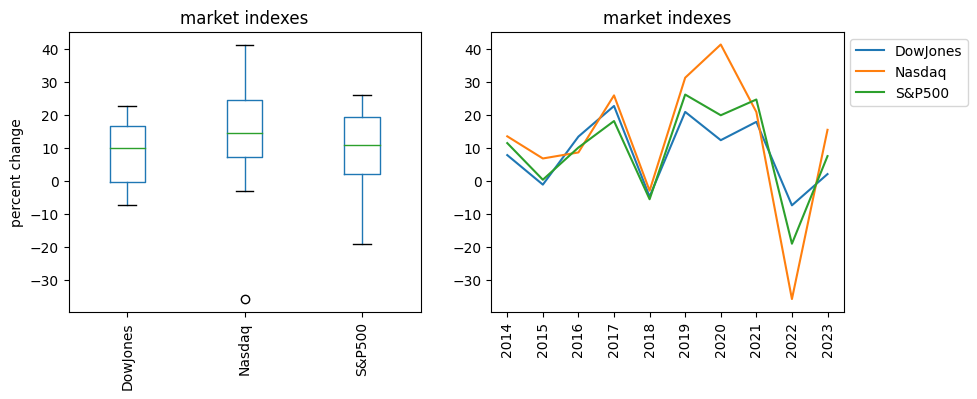

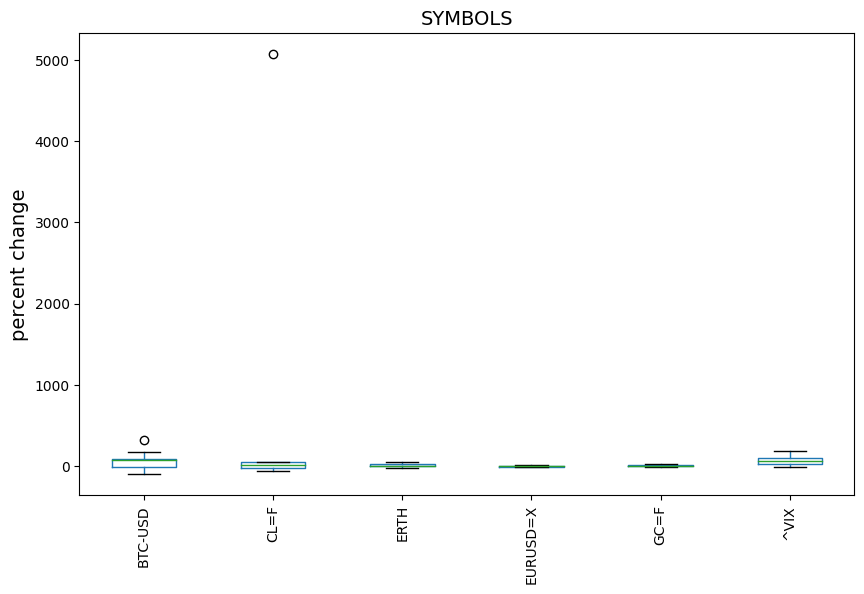

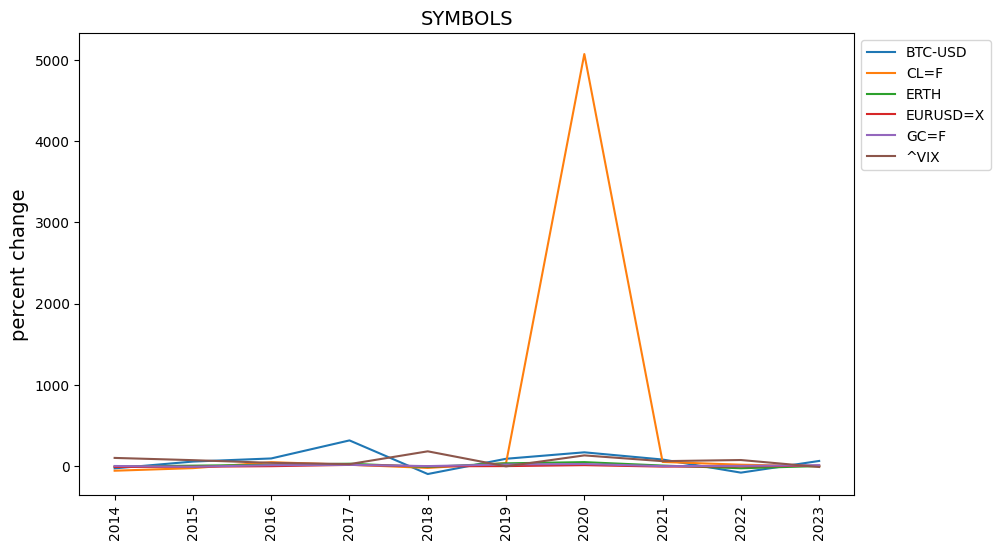


RETURNS FROM 2014 TO 2023:
  DowJones     83.20%
    Nasdaq    124.35%
    S&P500     93.04%
   BTC-USD    644.93%
      CL=F   5116.62%
      ERTH     77.91%
  EURUSD=X    -19.90%
      GC=F     59.29%
      ^VIX    654.04%


In [ ]:
plotPerformance(perf_yr.tail(10))  # past 10 years

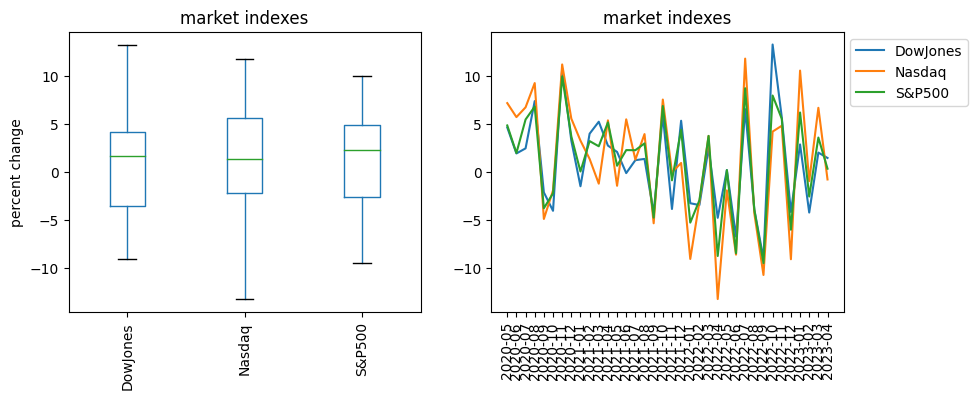

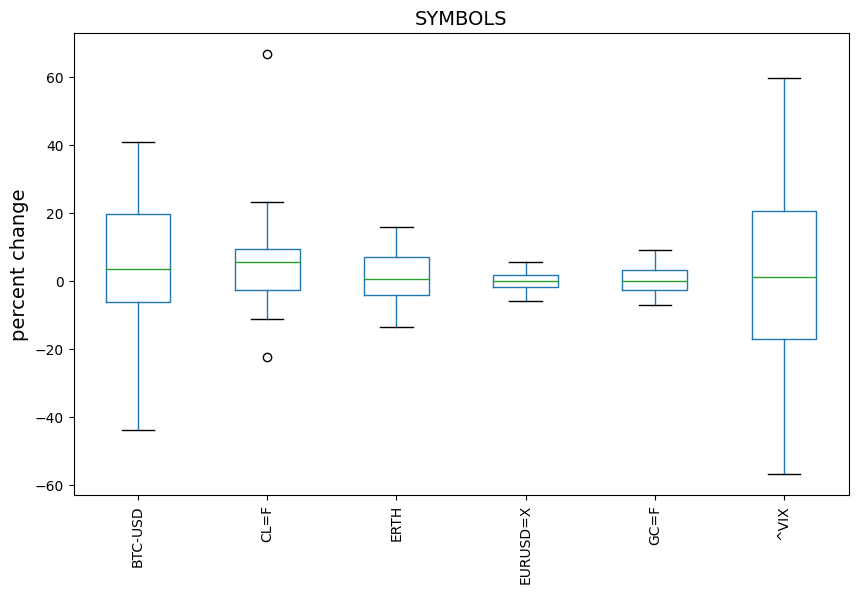

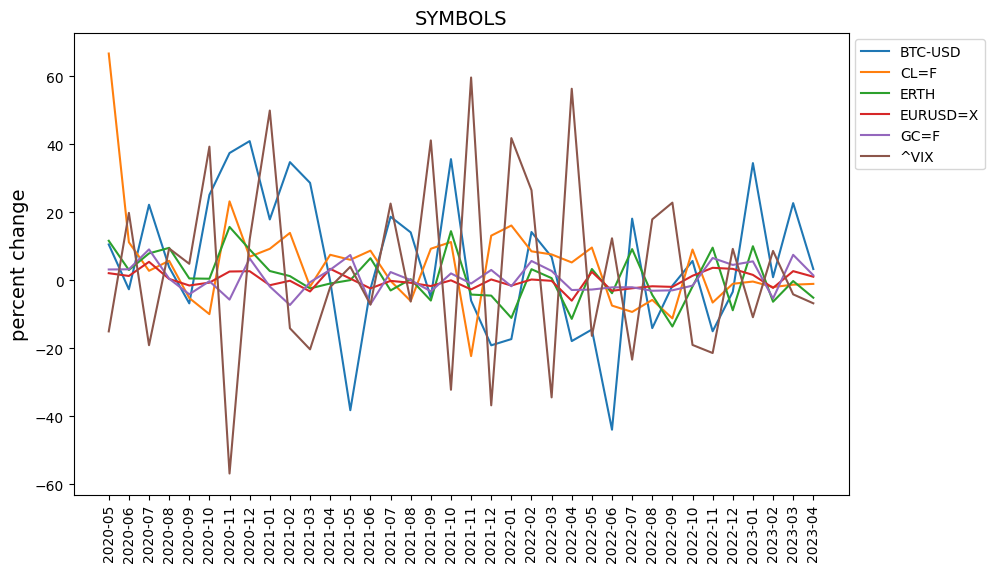


RETURNS FROM 2020-05 TO 2023-04:
  DowJones     36.41%
    Nasdaq     38.99%
    S&P500     39.50%
   BTC-USD    188.89%
      CL=F    161.31%
      ERTH     32.77%
  EURUSD=X      2.11%
      GC=F     20.16%
      ^VIX    113.22%


In [ ]:
plotPerformance(perf_mh.tail(36))  # past 36 months

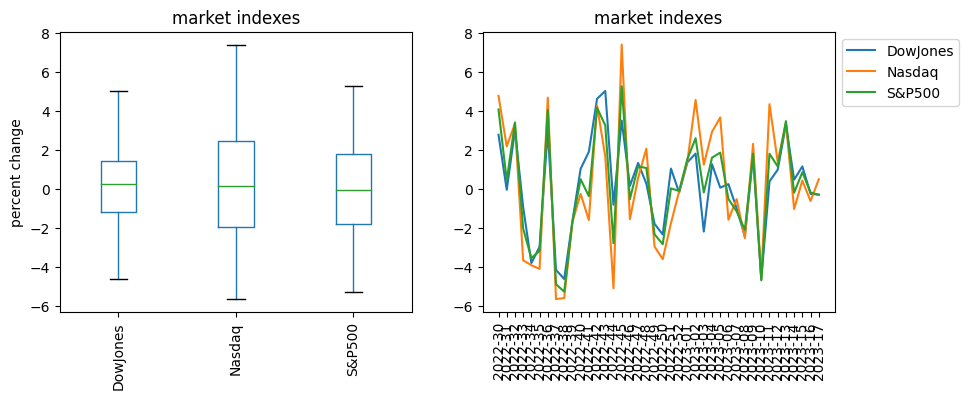

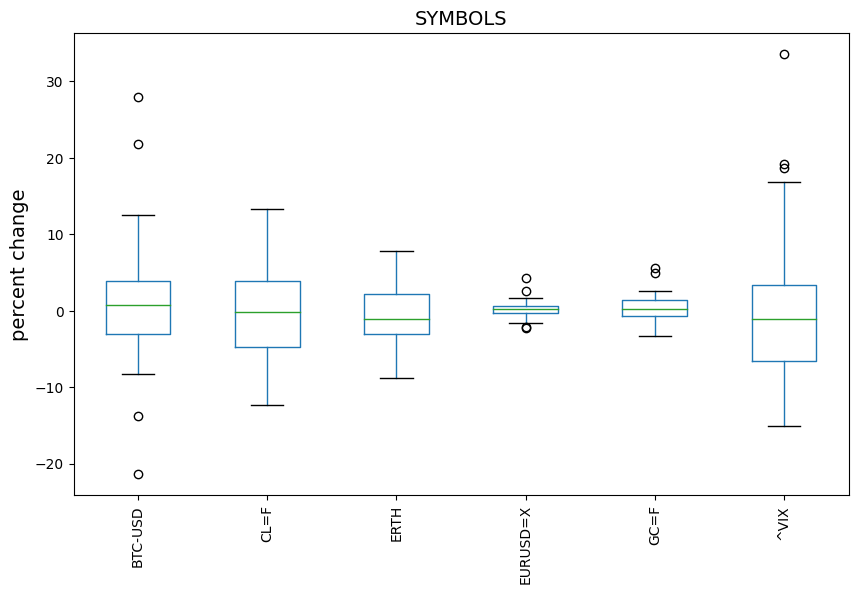

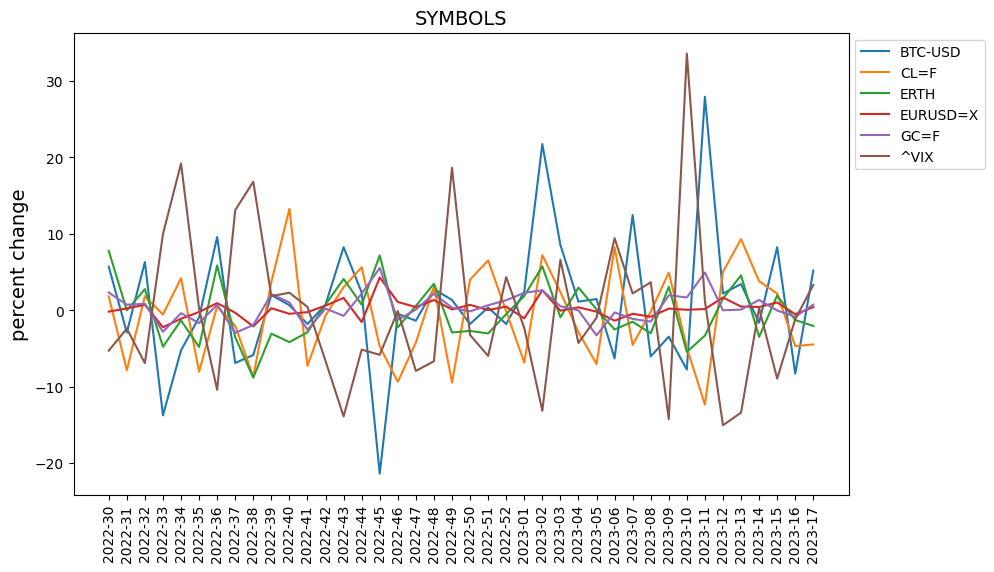


RETURNS FROM 2022-30 TO 2023-17:
  DowJones      6.48%
    Nasdaq      4.87%
    S&P500      5.35%
   BTC-USD     37.65%
      CL=F    -19.73%
      ERTH    -12.75%
  EURUSD=X      7.90%
      GC=F     15.38%
      ^VIX     -6.24%


In [ ]:
plotPerformance(perf_wk.tail(40))  # past 40 weeks


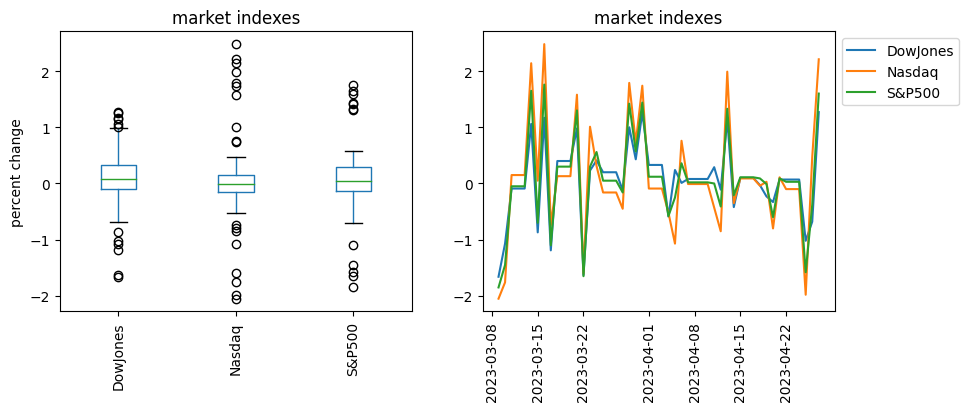

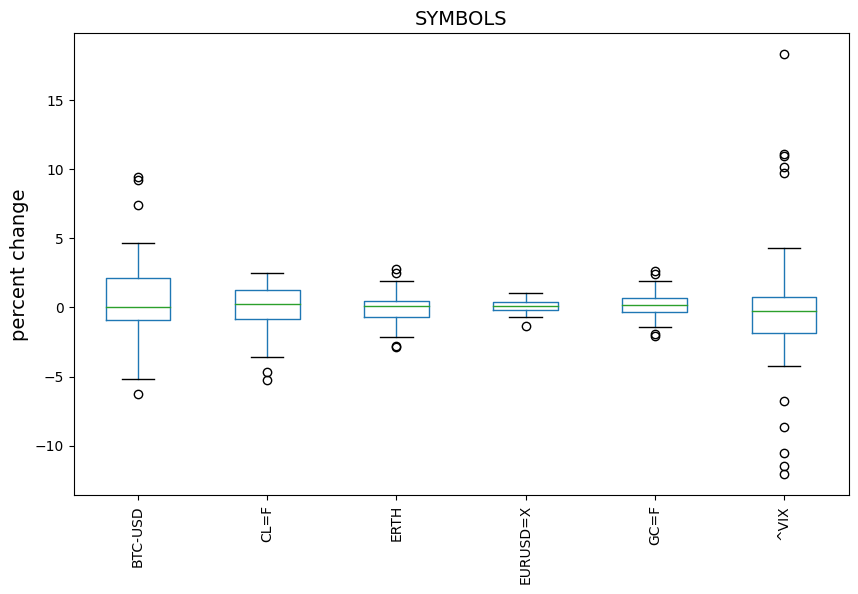

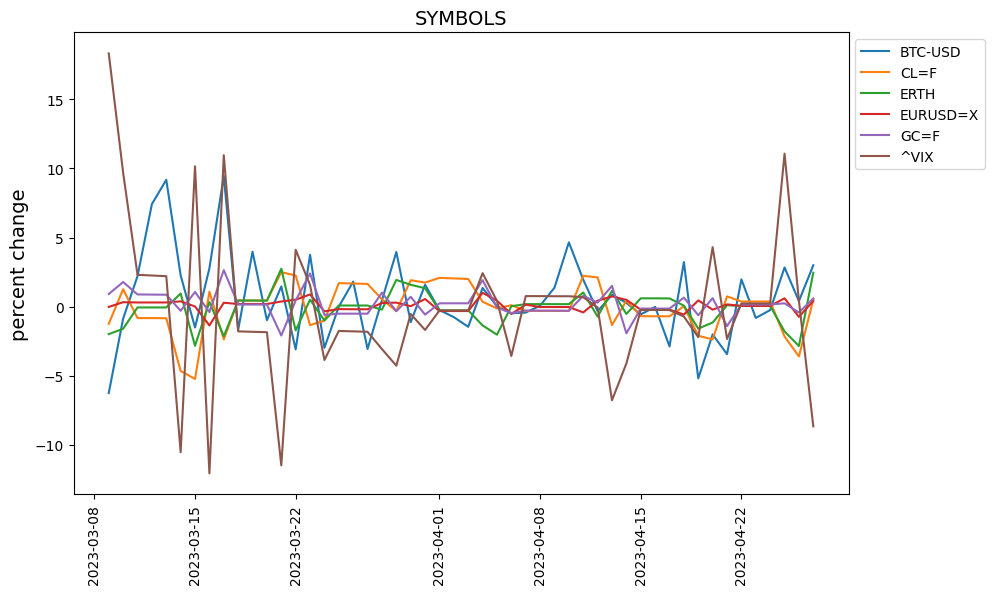


RETURNS FROM 2023-03-09 00:00:00 TO 2023-04-27 00:00:00:
  DowJones      2.96%
    Nasdaq      4.78%
    S&P500      3.30%
   BTC-USD     32.27%
      CL=F     -1.87%
      ERTH     -5.63%
  EURUSD=X      4.37%
      GC=F      9.92%
      ^VIX     -3.32%


In [ ]:
plotPerformance(perf_dy.tail(50))

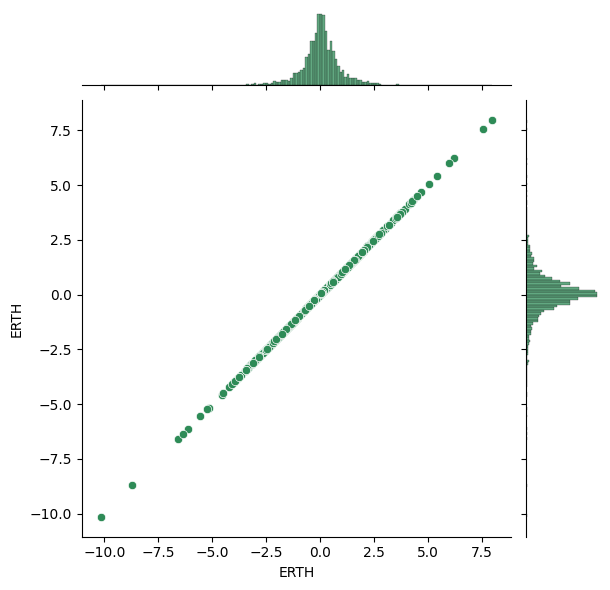

In [ ]:
sns.jointplot(x='ERTH', y='ERTH', data=yf_returns, kind='scatter', color='seagreen')


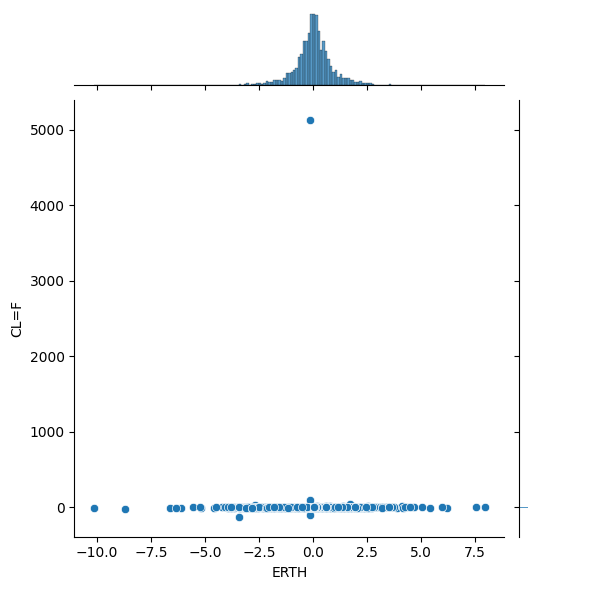

In [ ]:
sns.jointplot(x='ERTH', y='CL=F', data=yf_returns, kind='scatter')

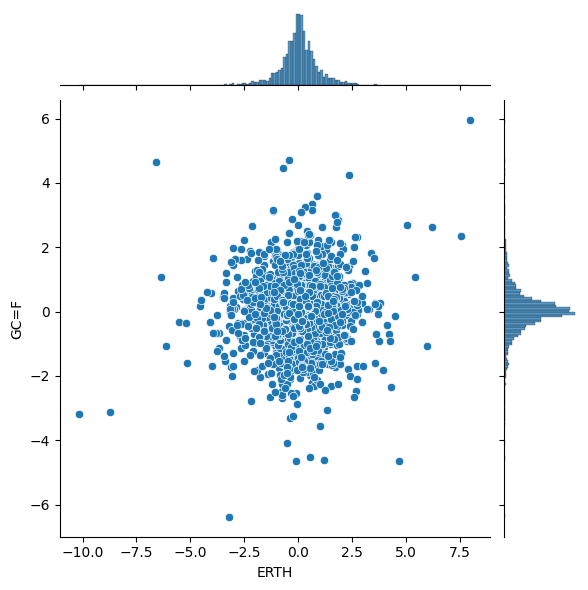

In [ ]:
sns.jointplot(x='ERTH', y='GC=F', data=yf_returns, kind='scatter')

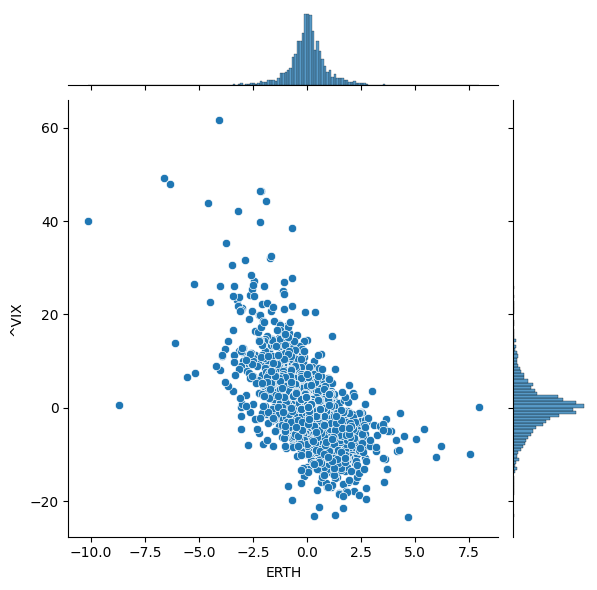

In [ ]:
sns.jointplot(x='ERTH', y='^VIX', data=yf_returns, kind='scatter')

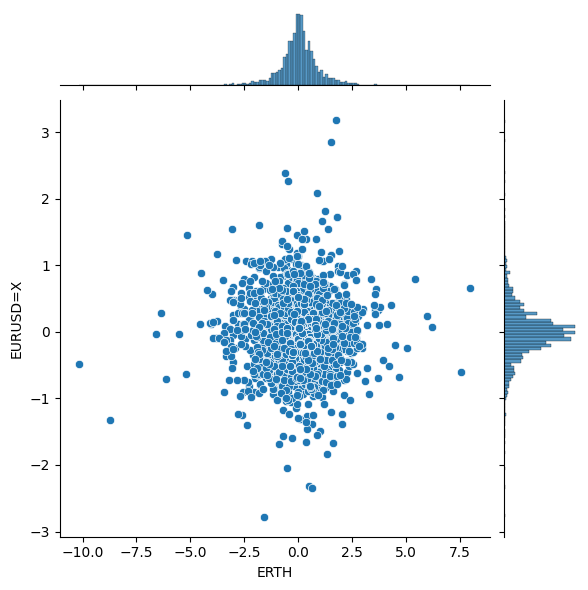

In [ ]:
sns.jointplot(x='ERTH', y='EURUSD=X', data=yf_returns, kind='scatter')

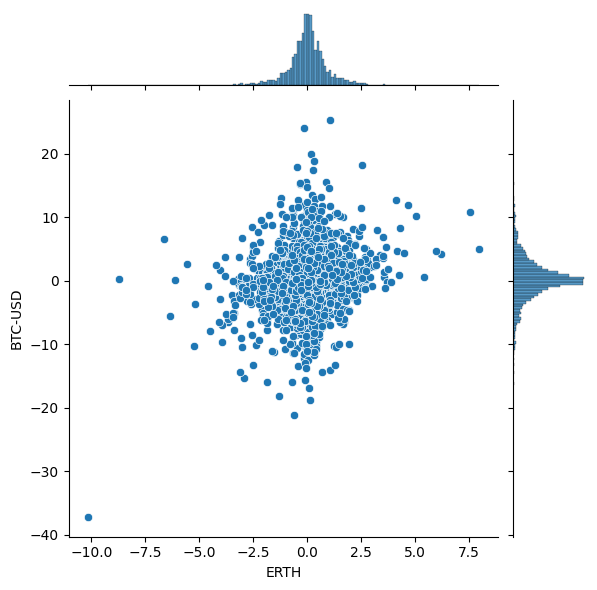

In [ ]:
sns.jointplot(x='ERTH', y='BTC-USD', data=yf_returns, kind='scatter')

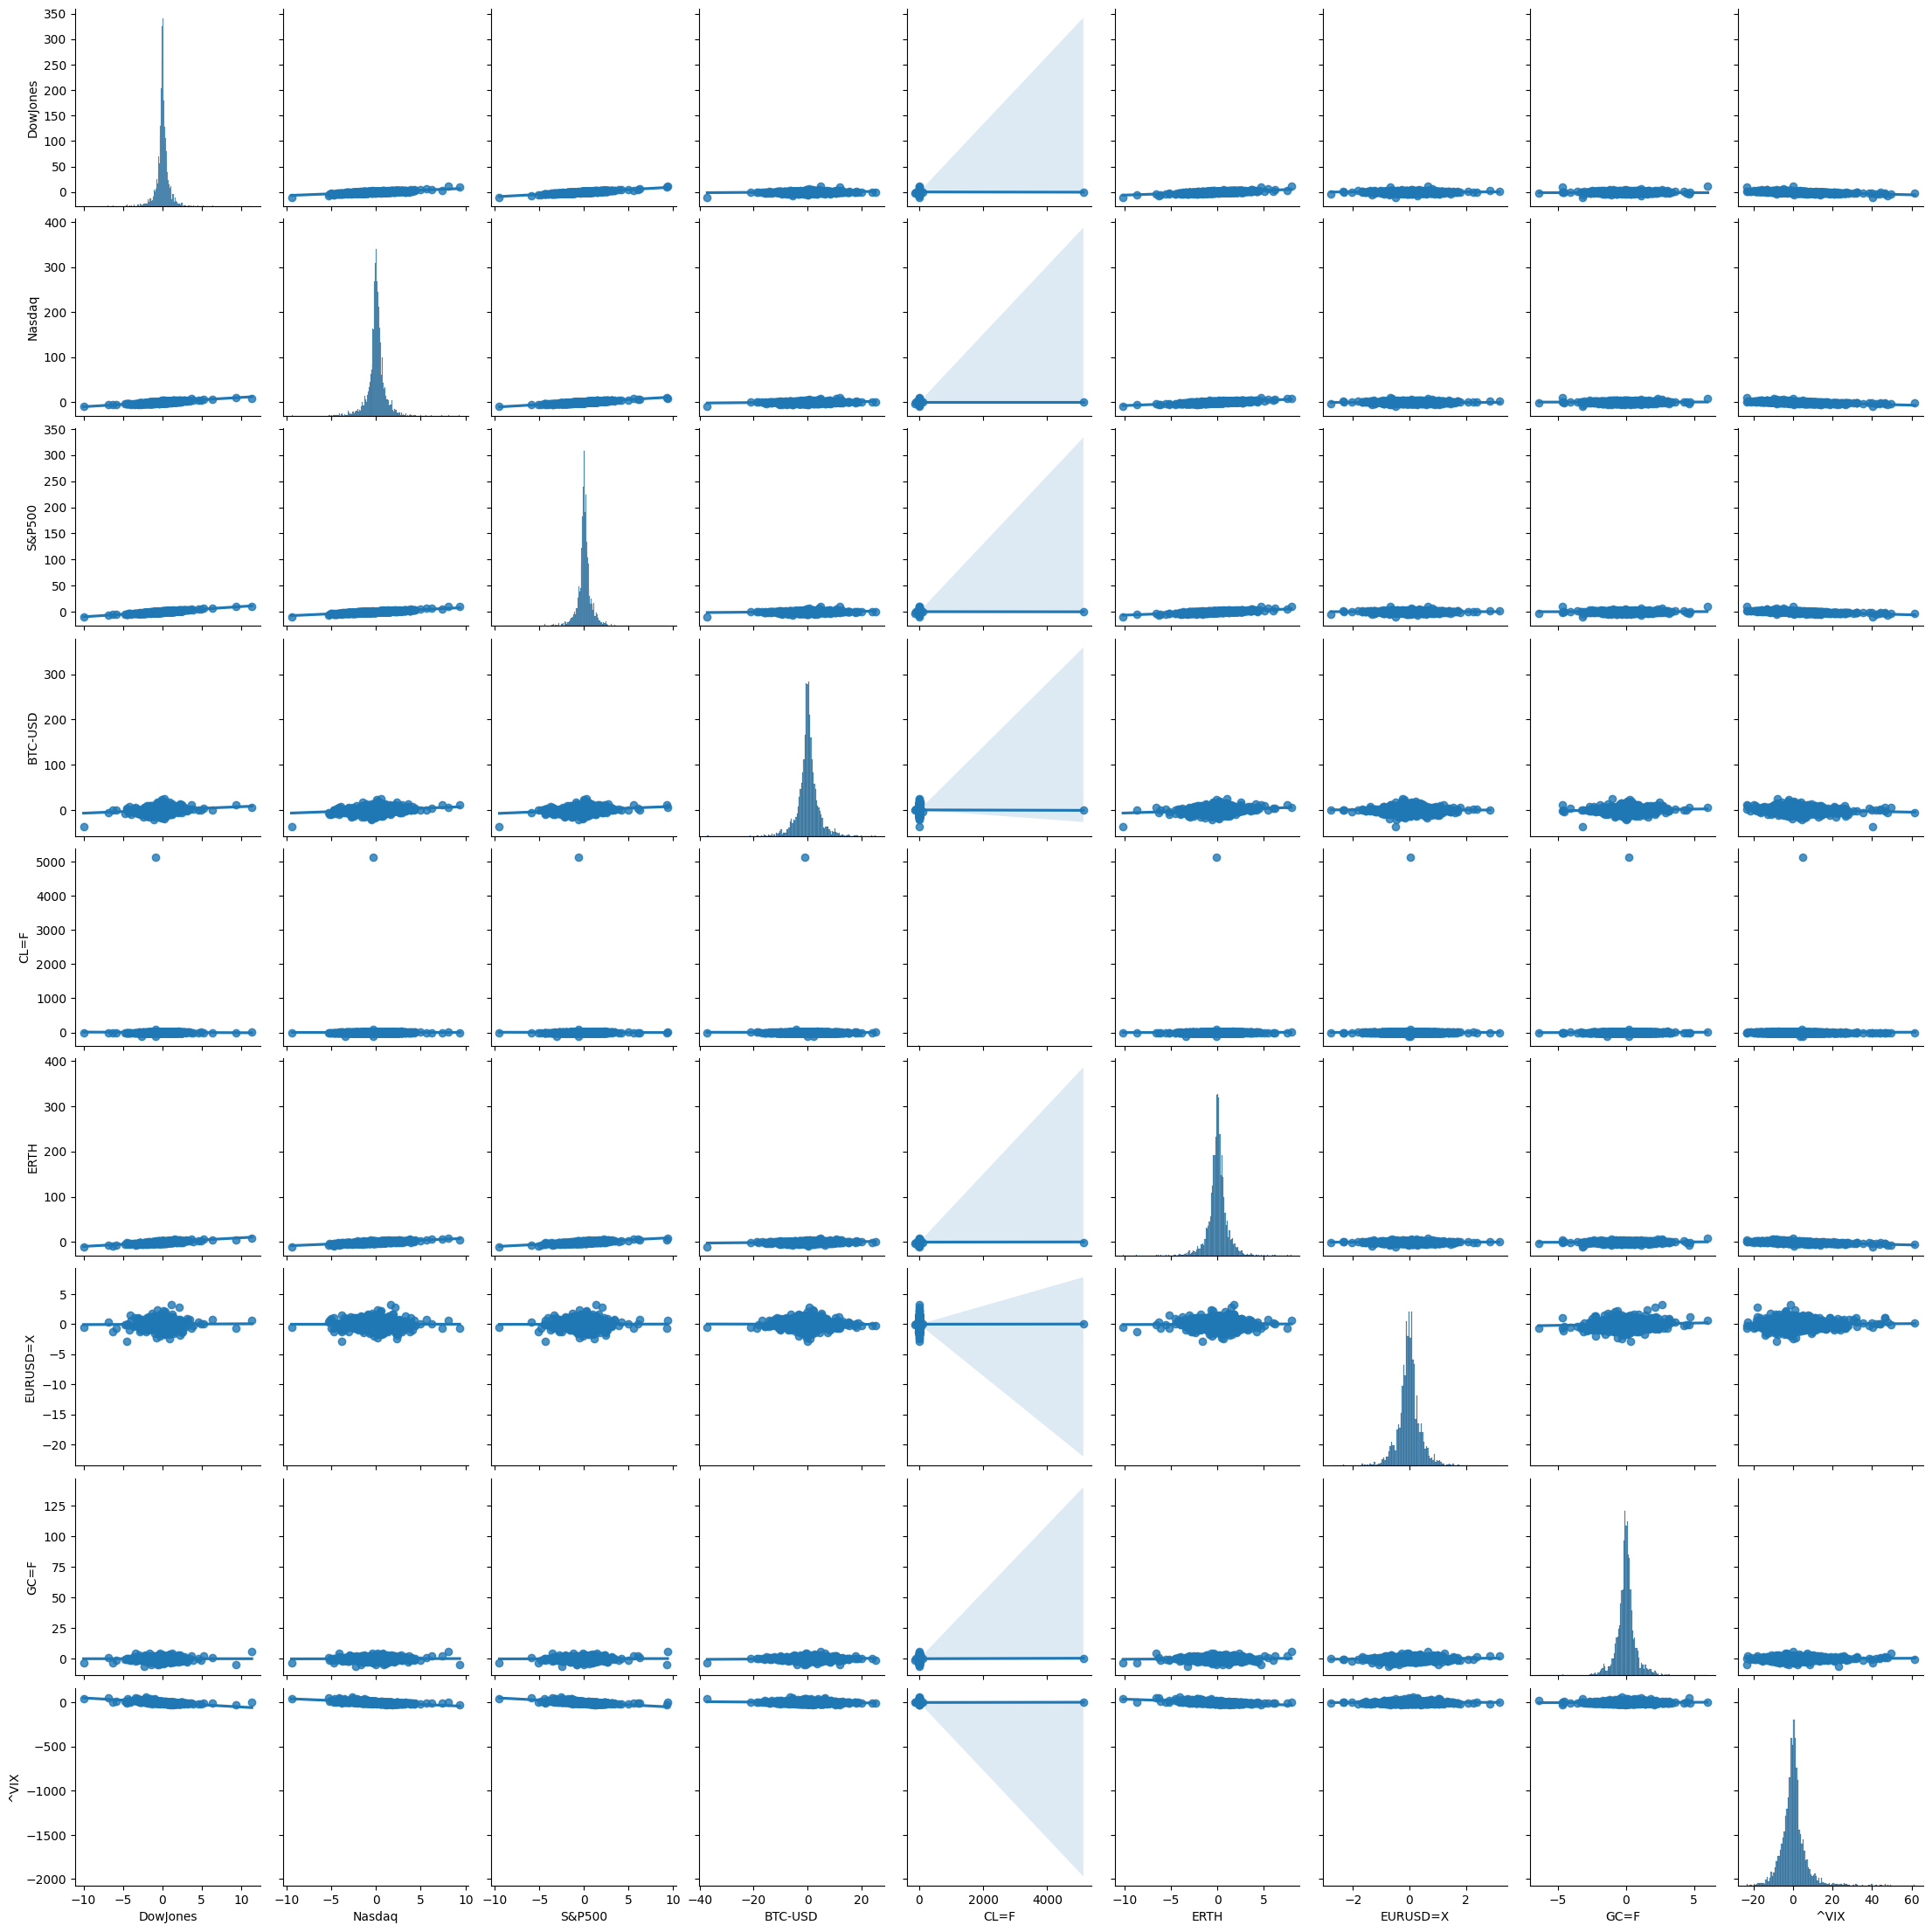

In [ ]:
sns.pairplot(yf_returns, kind='reg')

<ipython-input-29-1b697f8ad0cf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yf_returns.corr(), annot=True, cmap='summer')


Text(0.5, 1.0, 'Correlation of stock return')

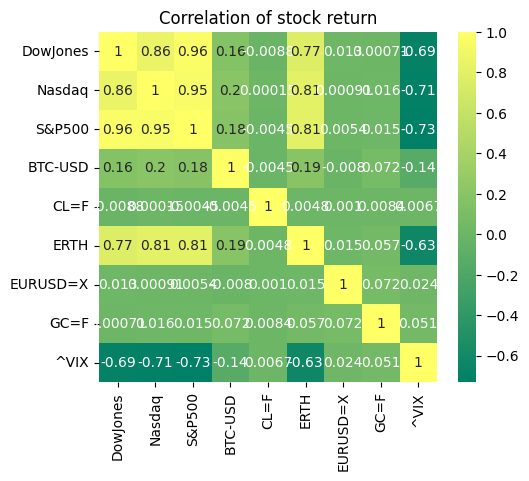

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(yf_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')


In [ ]:
#Predictions

In [ ]:
yf_returns.head()

,DowJones,Nasdaq,S&P500,BTC-USD,CL=F,ERTH,EURUSD=X,GC=F,^VIX,YEAR,MONTH,WEEK
Date,,,,,,,,,,,,
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,2013-04,2013-17
2013-04-30,0.14,0.66,0.25,NaN,-1.10,0.48,0.41,0.33,-1.39,2013,2013-04,2013-17
2013-05-01,-0.94,-0.89,-0.93,NaN,-2.60,-0.87,0.55,-1.76,7.17,2013,2013-05,2013-17
2013-05-02,0.89,1.26,0.94,NaN,3.25,-0.28,0.11,1.48,-6.21,2013,2013-05,2013-17
2013-05-03,0.96,1.14,1.05,NaN,1.72,1.60,-0.89,-0.23,-5.45,2013,2013-05,2013-17


In [ ]:
yf_returns.tail()

,DowJones,Nasdaq,S&P500,BTC-USD,CL=F,ERTH,EURUSD=X,GC=F,^VIX,YEAR,MONTH,WEEK
Date,,,,,,,,,,,,
2023-04-23,0.07,-0.10,0.03,-0.81,0.38,0.06,0.06,0.16,0.24,2023,2023-04,2023-17
2023-04-24,0.07,-0.10,0.03,-0.24,0.38,0.06,0.06,0.16,0.24,2023,2023-04,2023-17
2023-04-25,-1.02,-1.98,-1.58,2.84,-2.15,-1.78,0.61,0.25,11.07,2023,2023-04,2023-17
2023-04-26,-0.68,0.47,-0.38,0.41,-3.59,-2.84,-0.73,-0.42,0.43,2023,2023-04,2023-17
2023-04-27,1.27,2.21,1.60,3.00,0.52,2.46,0.42,0.60,-8.65,2023,2023-04,2023-17


In [ ]:
# Get the stock quote
from datetime import datetime
from pandas_datareader import data as pdr
import numpy as np

yf.pdr_override()

df_ERTH = pdr.get_data_yahoo('ERTH', start='2013-04-29', end='2023-04-27')
# Show returns data
df_ERTH

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-29,25.030001,25.219999,25.030001,25.209999,20.328253,10200
2013-04-30,25.190001,25.330000,25.190001,25.330000,20.425013,1600
2013-05-01,25.400000,25.400000,25.020000,25.110001,20.247614,1300
2013-05-02,24.959999,25.139999,24.950001,25.040001,20.191170,8000
2013-05-03,25.180000,25.540001,25.180000,25.440001,20.513706,2800
...,...,...,...,...,...,...
2023-04-20,47.689999,47.849998,47.320000,47.529999,47.529999,11300
2023-04-21,47.549999,47.730000,47.230000,47.580002,47.580002,9000
2023-04-24,47.599998,47.759998,47.299999,47.660000,47.660000,14500


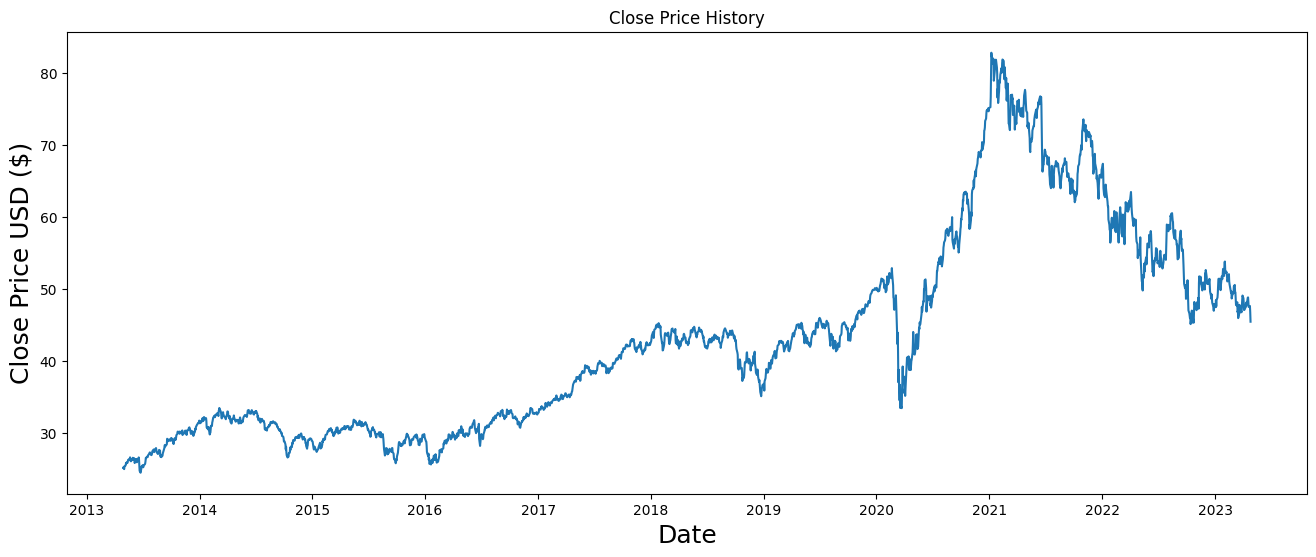

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_ERTH['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
x = df_ERTH.drop(['Close','Adj Close'],axis=1)
y = df_ERTH.loc[:,'Adj Close']

In [ ]:
x.tail()

,Open,High,Low,Volume
Date,,,,
2023-04-20,47.689999,47.849998,47.320000,11300
2023-04-21,47.549999,47.730000,47.230000,9000
2023-04-24,47.599998,47.759998,47.299999,14500
2023-04-25,47.009998,47.090000,46.660000,18100
2023-04-26,46.450001,46.450001,44.980000,22600


In [ ]:
y.tail()

Date
2023-04-20    47.529999
2023-04-21    47.580002
2023-04-24    47.660000
2023-04-25    46.810001
2023-04-26    45.480000
Name: Adj Close, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_train, y_train),LR.score(x_test,y_test)
prediction = LR.predict(x_test)
mse_lr = mean_squared_error(y_test, prediction)
R2_lr = r2_score(y_test, prediction)
print("mse_model_1:", mse_lr)
print("r2_score_model_1", R2_lr)

mse_model_1: 7.101477345073567
r2_score_model_1 0.962918932465109


In [ ]:
print(prediction)

[27.63551962 37.64260285 24.88854128 28.64447848 47.01353756 27.42774732
 26.65735219 54.35763232 39.32208786 40.4037687  25.54521051 32.25087878
 21.34581872 22.63274833 25.34372125 25.32500747 30.97092036 23.10693828
 31.55876947 35.77683191 33.02461838 35.78016013 67.64035196 33.05007547
 20.94007235 27.20879985 26.66084784 24.02777187 35.5147678  33.78255015
 29.68103703 44.17749971 20.87736146 62.28363938 37.21175586 33.0429458
 23.78899071 37.91625727 25.4459722  39.37942438 26.04513359 24.57113327
 54.91243944 39.34205325 45.38066441 41.51561938 39.57817851 27.10073805
 27.10781414 37.97232753 40.68594787 41.35988894 37.67384003 57.03472167
 60.55448022 23.85243978 27.03416175 57.23757343 30.73002907 25.52974157
 43.7813557  39.32559435 45.037285   28.93140894 26.82109191 50.24422837
 57.97523903 23.11254148 40.04092283 39.90179677 39.79704274 39.70739967
 60.09712631 28.02376605 37.16833559 56.50656223 44.03139495 29.95571679
 44.94561864 25.03242851 37.4873838  39.41730288 20.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_reg.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf_reg.predict(x_test)

# Calculate the mean squared error of the predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)

#calculate the R2 score
r2_rf = r2_score(y_test, y_pred_rf)
print("mse_model_2:", mse_rf)
print("R2_score_model_2:", r2_rf)

mse_model_2: 4.277667711589267
R2_score_model_2: 0.9776637342347783


In [ ]:
print(y_pred_rf)

[26.84354513 36.14726604 24.59985752 28.56061243 50.71293308 27.18204374
 25.69411924 58.65212105 38.26273338 38.78667397 25.47570045 31.54413568
 21.81660629 22.98865175 25.28978756 25.08248421 30.28246599 23.6567201
 30.35104158 35.01444332 32.3118346  34.20995678 63.81812992 31.98998499
 21.32916786 26.69189569 26.16726227 24.20584347 34.8041806  32.9170549
 29.47645863 46.78805988 21.21047041 64.38634941 36.16534565 32.59480618
 23.95838264 36.8166708  25.29538548 37.98143471 25.76985632 24.57172783
 58.64021206 38.25729774 47.31198681 42.03595715 38.25442078 26.57631023
 26.82507851 36.6985284  43.39350338 45.87753147 36.17449436 56.84387272
 64.24799084 23.98900503 26.82233543 58.5470549  29.38247519 25.39289017
 43.68289726 38.08931316 48.85837791 29.09349056 26.51959017 54.83082561
 59.84690697 23.37521915 39.65878002 39.13910461 38.4508374  38.38445168
 64.51332066 27.97685715 36.11105759 60.67135147 47.33031849 29.55171778
 47.08236481 24.58056362 36.39210896 37.9409359  21.1

In [ ]:
from sklearn.svm import SVR

# Initialize the SVM Regressor
svm_reg = SVR(kernel='rbf')

# Train the model on the training set
svm_reg.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred_svr = svm_reg.predict(x_test)

# Calculate the mean squared error of the predictions
mse_svr = mean_squared_error(y_test, y_pred_svr)

r2_svr = r2_score(y_test, y_pred_svr)
print("mse_model_3:", mse_svr)
print("r2_score_model_3:", r2_svr)

mse_model_3: 104.34424928636095
r2_score_model_3: 0.45515616446355467


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train the decision tree model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dct = dt.predict(x_test)

# Evaluate the model's performance
mse_dct = mean_squared_error(y_test, y_pred_dct)
r2_dct = r2_score(y_test, y_pred_dct)
print('mse_model_4:', mse_dct)
print('r2_score_model_4:', r2_dct)

mse_model_4: 4.757680449053723
r2_score_model_4: 0.9751573011252266


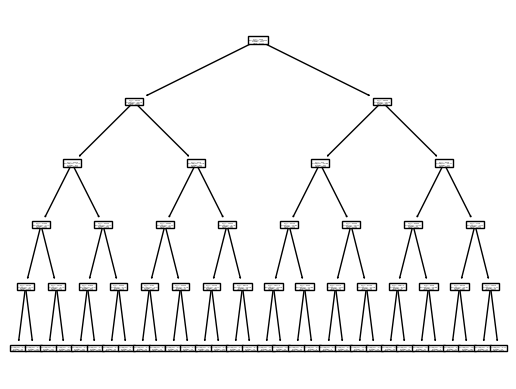

In [ ]:
import graphviz
from sklearn import tree
graph = tree.plot_tree(dt)

<ipython-input-46-e427c19bd19f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = yf_returns.corr()


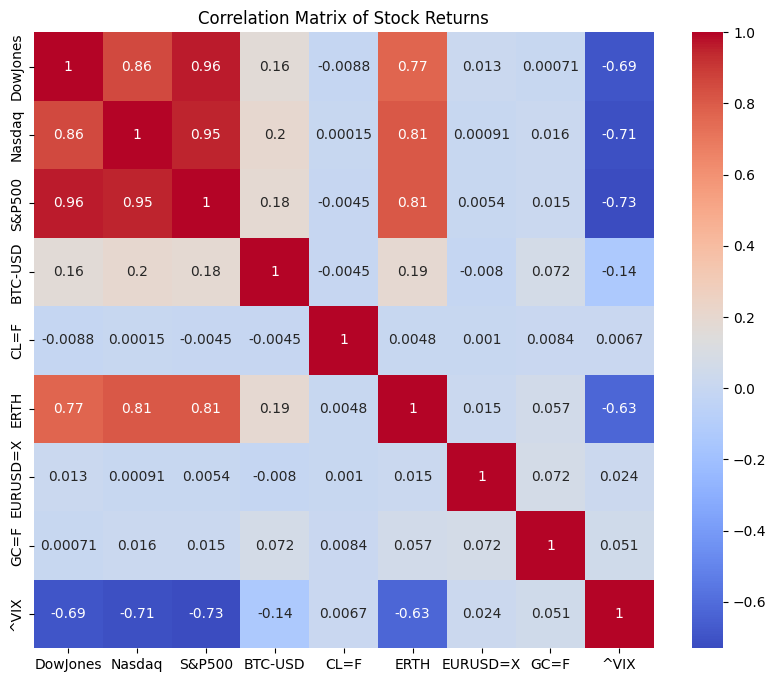

In [ ]:
corr_matrix = yf_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Returns')
plt.show()

In [ ]:
# Find the model with the lowest MSE
min_mse = min(mse_lr, mse_rf, mse_svr, mse_dct)
if min_mse == mse_lr:
    print("Model 1 has the lowest MSE")
elif min_mse == mse_rf:
    print("Model 2 has the lowest MSE")
elif min_mse == mse_svr:
    print("Model 3 has the lowest MSE") 
else:
    print("Model 4 has the lowet MSE")     

Model 2 has the lowest MSE
